<a href="https://colab.research.google.com/github/lukmanprasetyo/H8_KS009/blob/master/PYTN_fp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project 2 : Logistic Regression dan SVM**


# **A. Perkenalan**

Nama : Lukman Prasetyo Nugroho (PYTN-KS09-004)

**Latar Belakang** \
Australia mempunyai iklim yang bervariasi di delapan negara bagian dan wilayahnya. Kebanyakan wilayah australia memiliki empat musim, sementara musim kering dan hujan berlangsung di wilayah tropis di utara benua.
Jumlah tahunan curah hujan di australia sendiri sekitar 622 mm. Faktor yang mempengaruhi curah hujan diantaranya suhu, kelembaban, tekanan udara, kecepatan angin, dan lain sejenisnya.
Berdasarkan faktor faktor tersebut, dapat dilakukan analisa untuk membuat model untuk memprediksi terjadinya hujan atau tidak.

**Dataset** \
Dataset yang digunakan berasal dari https://www.kaggle.com/jsphyg/weather-dataset-rattle-package \
Dataset tersebut berisi data perkiraan hujan di seluruh daerah australia selama 10 tahun, yang terdiri dari 23 atribut dan 145460 baris. Atribut yang menjadi target yaitu kolom RainTomorrow yang berisi "No"(Besok tidak hujan) dan "Yes"(Besok terjadi hujan).

**OBJECTIVE**
Tujuan yang ingin dicapai, diantaranya : \

*   Paham konsep Classification dengan Logistic Regression dan SVM
*   Mengetahui cara mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
* Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi
* Menjawab latar belakang mengenai faktor apa saja yang mempengaruhi prediksi cuaca pada hari esok.





  

# **B. Import Package**

Mengimport package(pustaka) yang digunakan untuk mengolah data dari awal hingga akhir.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

# **C. Data Loading**

Tahapan data loading berisi proses eksplorasi data yang akan di olah (kelola),
data yang akan diolah, berada di google drive. Sehingga ada proses import ke drive, yang selanjutnya data dapat dipanggil dan diolah lebih lanjut.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls "drive/My Drive"

In [3]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = '/content/drive/MyDrive/dataset'

In [4]:
%cd drive/MyDrive/dataset/

/content/drive/MyDrive/dataset


**1. Melakukan loading data, serta menampilkan isi dari data tersebut.**

In [5]:
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Diketahui jumlah baris 145.460 dan 23 kolom. Untuk memastikan, dapat juga diketahui dengan menggunakan df.shape


In [6]:
df.shape

(145460, 23)

 **2. Melihat Kolom yang ada didalam dataset.**

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

**3. Melihat Tipe data dari Kolom, baris yang ada didalam dataset.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dari data yang ada, diketahui jumlah tipe data float dan objek. Tipe data float ada 16 dan tipe data objek ada 7.

**4. Melihat Statistik Deskriptif dari atribut numerik**

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**5. Melihat Statistik Deskriptif dari atribut Object**

In [10]:
df.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


# **D. Data Cleaning**

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai dan lain sebagainya.


**1. Mengecek apakah pada dataset terdapat missing value**


In [11]:
df.isnull().values.any()

True

**2. Melihat dimana missing value berada**

In [12]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**3. Menangani missing value pada tipe data object dengan mode(modus)**

In [13]:
categorical = [i for i in df.columns if df[i].dtypes == 'O']

for cat_col in categorical:
    df[cat_col].fillna(df[cat_col].mode()[0],inplace=True)
    
df[categorical].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

**4. Menangani missing value pada tipe data numerik dengan median**

In [14]:
numerical = [i for i in df.columns if i not in categorical]

for num_col in numerical:
    df[num_col].fillna(df[num_col].median(),inplace=True)
    
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

**5. Melihat missing value**

In [15]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [16]:
df.isnull().values.any()

False

In [17]:
df.duplicated().sum() #Melihat duplikat data

0

# **E. Explorasi Data**

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

**1. Melihat Min Temperature dari data yang ada**

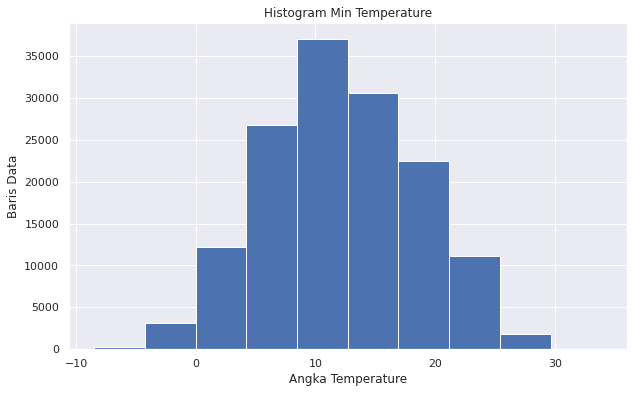

In [32]:
df.MinTemp.plot(kind='hist', figsize=(10,6))

plt.title('Histogram Min Temperature')
plt.ylabel('Baris Data')
plt.xlabel('Angka Temperature')
plt.show()

**2. Melihat Max Temperature dari data yang ada**

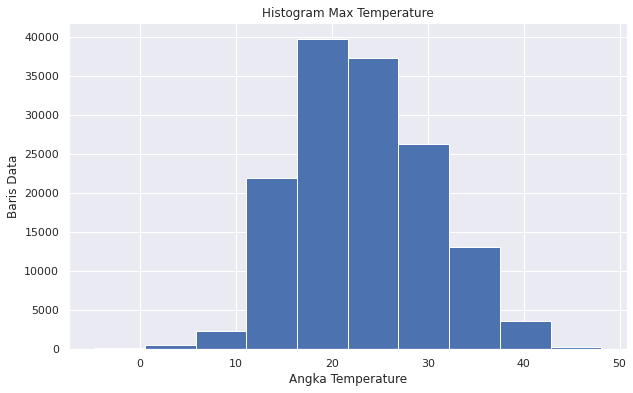

In [30]:
df.MaxTemp.plot(kind='hist', figsize=(10,6))

plt.title('Histogram Max Temperature')
plt.ylabel('Baris Data')
plt.xlabel('Angka Temperature')
plt.show()

**3. Melihat Curah Hujan**

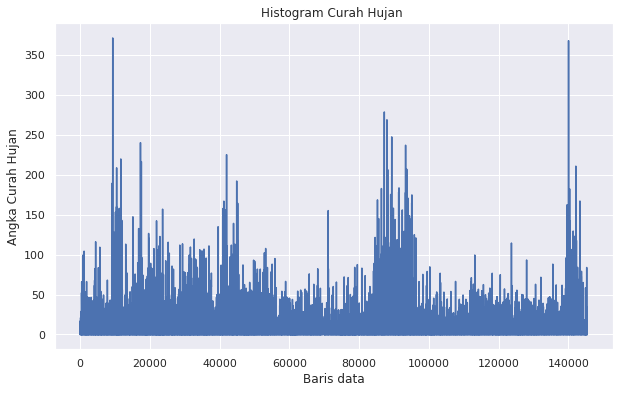

In [39]:
df.Rainfall.plot(kind='line', figsize=(10,6))

plt.title('Histogram Curah Hujan ')
plt.ylabel('Angka Curah Hujan')
plt.xlabel('Baris data')
plt.show()

**4. Melihat hubungan antara temperatur rendah dengan curah hujan**

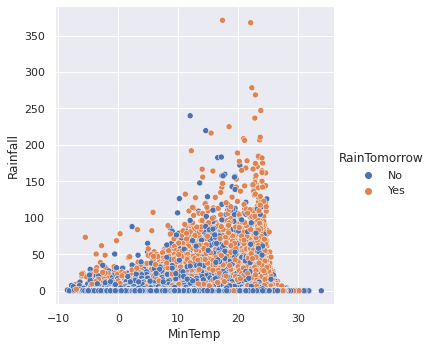

In [41]:

sns.relplot(x='MinTemp', y = 'Rainfall', hue = "RainTomorrow", data = df);

**5.Melihat hubungan antara suhu tinggi dengan sinar matahari**

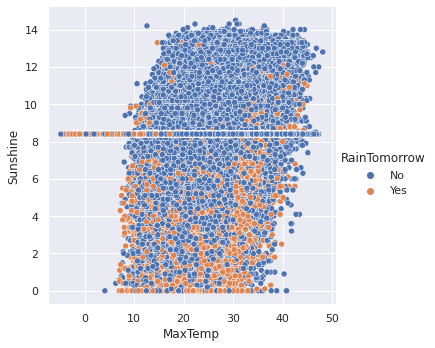

In [49]:

sns.relplot(x='MaxTemp', y = 'Sunshine', hue = "RainTomorrow", data = df);

**6. Melihat hujan besok di setiap lokasi**

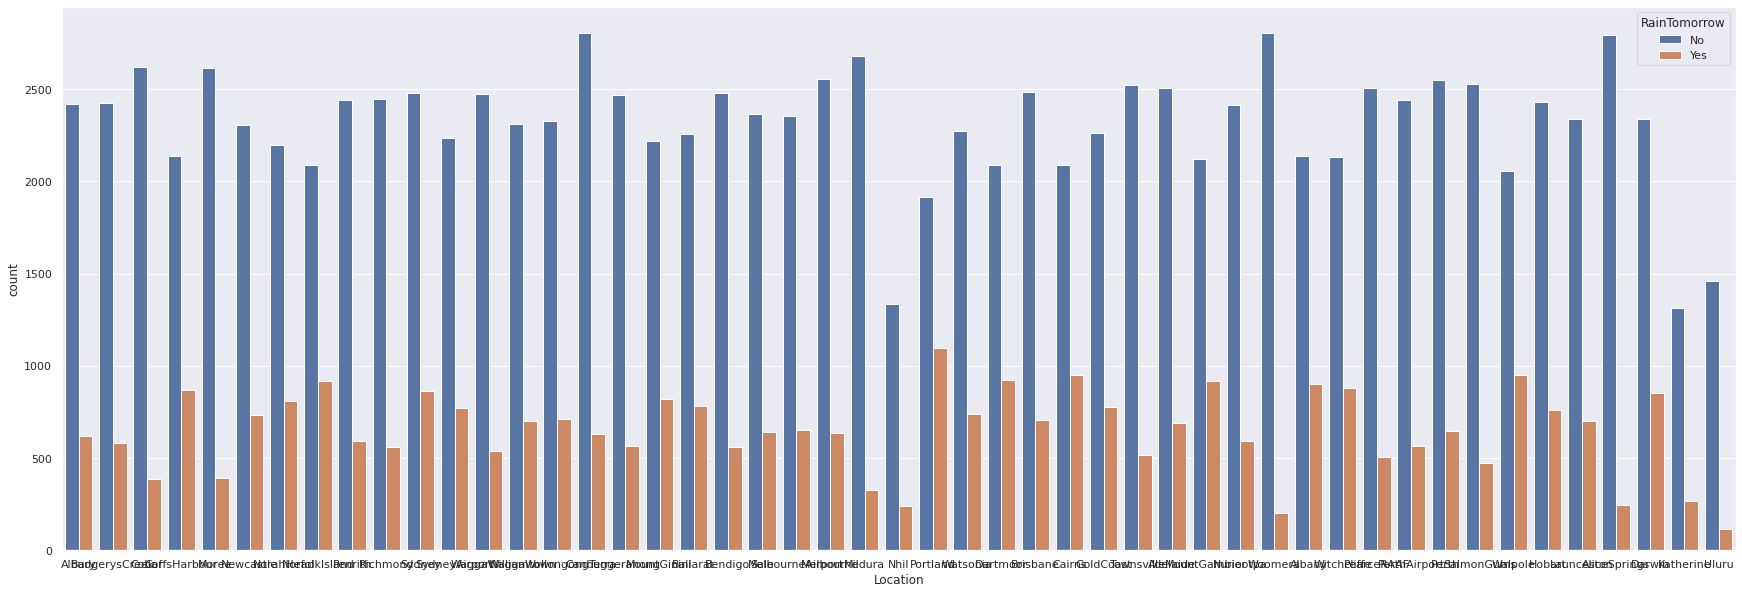

In [48]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=df)

**7. Melihat hubungan antar variabel**

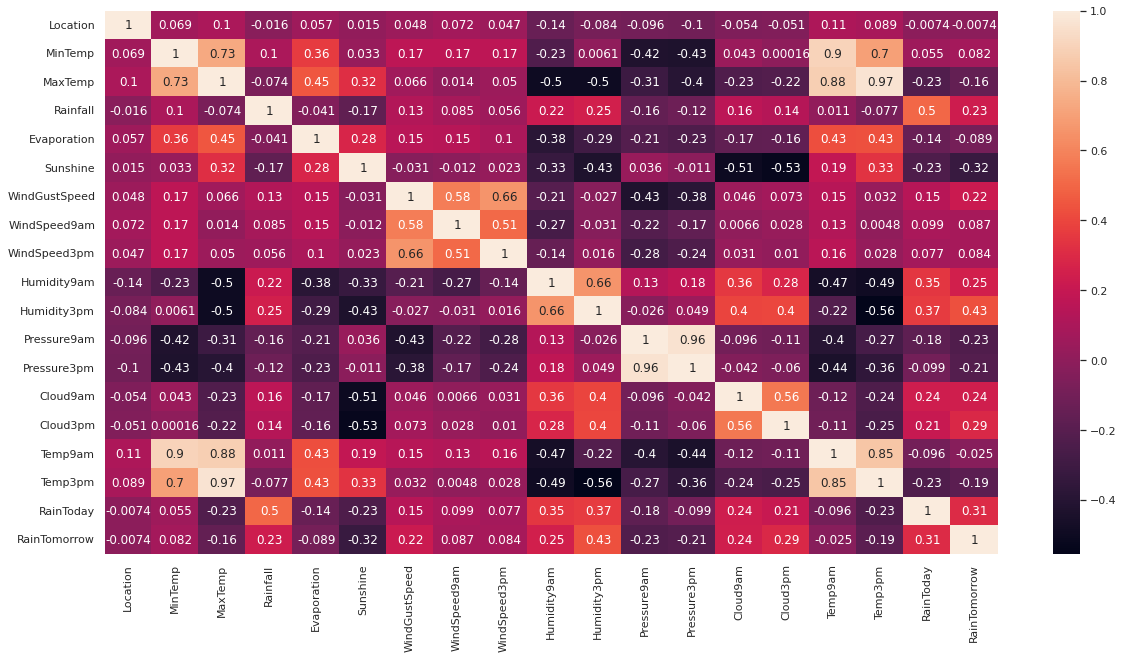

In [56]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Berdasarkan visualisasi heatmap diatas, diketahui jika setiap kolom saling berhubungan.

# **F. Data Preprocessing**
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

**1. mendefinisikan x untuk semua kolom dan y untuk kolom Raintomorrow**

In [51]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

print(X.shape)
print(y.shape)

(145460, 22)
(145460,)


**2. mengubah RainToday dan RainTomorrow ke biner**

In [52]:
df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

**3. mengubah lokasi ke biner**

In [53]:
def encode_data(feature_name):
     
    mapping_dict = {}
    unique_values = list(df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

df['Location'].replace(encode_data('Location'), inplace = True)

{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32, 'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37, 'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42, 'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47, 'Uluru': 48}


**4. Melihat hubungan antar variabel**

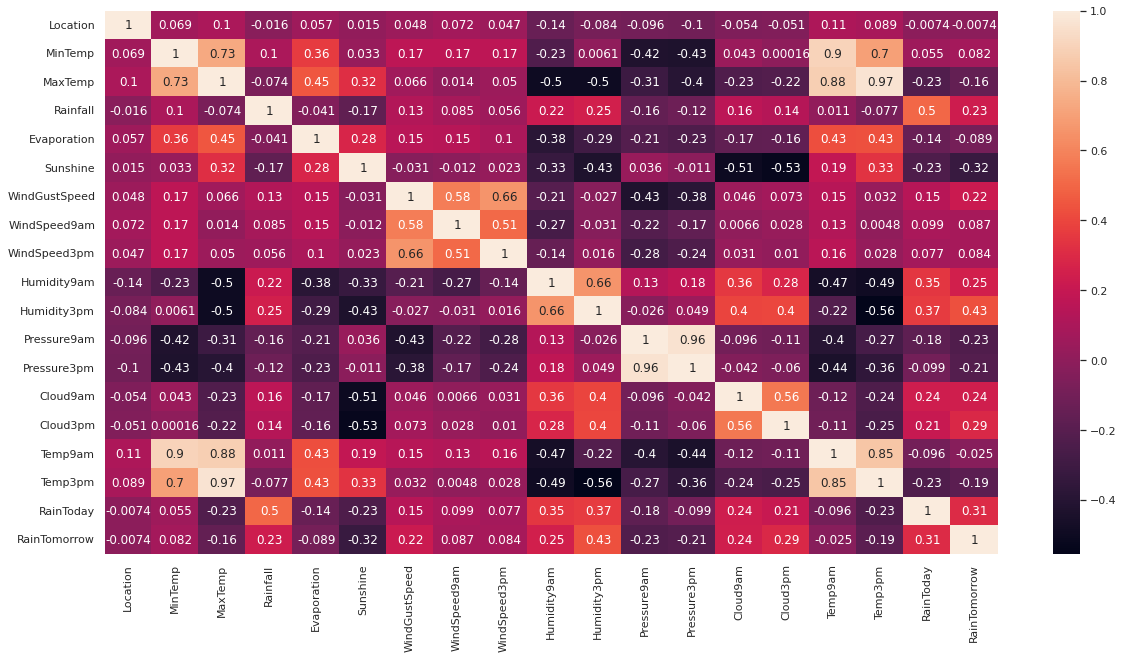

In [57]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [60]:
#Di drop alasannya tidak bisa diubah ke float dan tidak begitu penting
df.drop("Date", axis = 1, inplace = True)

**5. Membuat model fit untuk permodelan**

In [86]:
x_fit = df[['Location','MinTemp', 'Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Cloud9am','Cloud3pm','RainToday']]
x_fit

,Location,MinTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday
0,0,13.4,0.6,44.0,20.0,24.0,71.0,22.0,8.0,5.0,0
1,0,7.4,0.0,44.0,4.0,22.0,44.0,25.0,5.0,5.0,0
2,0,12.9,0.0,46.0,19.0,26.0,38.0,30.0,5.0,2.0,0
3,0,9.2,0.0,24.0,11.0,9.0,45.0,16.0,5.0,5.0,0
4,0,17.5,1.0,41.0,7.0,20.0,82.0,33.0,7.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...
145455,48,2.8,0.0,31.0,13.0,11.0,51.0,24.0,5.0,5.0,0
145456,48,3.6,0.0,22.0,13.0,9.0,56.0,21.0,5.0,5.0,0
145457,48,5.4,0.0,37.0,9.0,9.0,53.0,24.0,5.0,5.0,0
145458,48,7.8,0.0,28.0,13.0,7.0,51.0,24.0,3.0,2.0,0


**6. Membagi data menjadi training dan testing, Training sebesar 70% dan Testing 30%**

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x_fit, y, test_size=0.30, random_state=13)

In [88]:
print(X_train.shape)
print(X_test.shape)

(101822, 14)
(43638, 14)


Data Training sebanyak 101822 dan Data Testing 43638

# **G. Pendefinisian Model**
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.


Sesuai dengan perintah soal, maka menggunakan model Logistic Regression dan Support Vector Machines (SVM)

**1. model Logistic Regression**

In [89]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

**2. model  Support Vector Machines (SVM)**

In [90]:
svm_model = SVC(kernel='linear') 

# **H. Pelatihan Model**
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.


**1. model Logistic Regression**

In [93]:
logreg = logreg.fit(x_train, y_train)
logreg

LogisticRegression(random_state=0, solver='liblinear')

**2. Model Support Vector Machines (SVM)**

In [ ]:
modelsvm = svm_model.fit(x_train, y_train)
modelsvm

# **I. Evaluasi Model**
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Jika memilih untuk melakukan model deployment, lanjut ke poin dibawah. Jika tidak, lanjut ke poin 5 dan 6.


# **J. Model Inference**
Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.


# **K. Pengambilan Keputusan**
Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.